# <span style="color:blue; font-family:Arial;">Cleaning and Analyzing the kiva dataset</span>

**Ayaz Rahman Bhuiyan (MCS231023)**

<div style="display:flex; align-items:center;">
    <div style="flex:50%; padding:5px;">
        <img src="https://www.kiva.org/cps/logos/kiva_logo_filled.png" style="width:100%">
    </div>
    <div style="flex:50%; padding:5px; text-align:left; align-self: center;">
        <p style="color:black; font-family:Arial, sans-serif; font-weight: bold;">Kiva.org is an online crowdfunding platform. Kiva uses crowdfunded microloans as a force for good to create a space where people can have a one-to-one impact, and together, expand financial access for all.
Kiva loans give people the power and resources to build their chosen life.
Kiva has funded over $1.5 billion in loans to help more than 2 million people build better lives for themselves and their families.
My notebook will try to analyze Kiva data to highlight valuable ideas to help improve their performance</p>
    </div>
</div>

## <span style="color:Brown; font-family:Arial;">Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re

In [2]:
sns.set_style('ticks')
sns.set_palette('RdBu')

## <span style="color:Brown; font-family:Arial;">Loading Data</span>

In [3]:
!pip install mapclassify
!pip install -q kaggle
from google.colab import files

uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kiva/data-science-for-good-kiva-crowdfunding

!unzip -q /content/data-science-for-good-kiva-crowdfunding.zip

Saving kaggle.json to kaggle.json
 79% 33.0M/41.9M [00:00<00:00, 110MB/s]
100% 41.9M/41.9M [00:00<00:00, 115MB/s]


In [4]:
kivaloans = pd.read_csv('/content/kiva_loans.csv', parse_dates=True, index_col=['date'])

In [5]:
partners = pd.read_csv('/content/loan_themes_by_region.csv')

## <span style="color:Brown; font-family:Arial;">Discover and Clean Data</span>

In [6]:
kivaloans.head(4)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval
date,,,,,,,,,,,,,,,,,,,
2014-01-01,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular
2014-01-01,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular
2014-01-01,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet
2014-01-01,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular


In [7]:
# number of rows & columns
kivaloans.shape

(671205, 19)

In [119]:
# all information about the data
kivaloans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 653890 entries, 2014-01-01 to 2017-07-26
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  653890 non-null  object             
 1   funded_amount       653890 non-null  float64            
 2   loan_amount         653890 non-null  float64            
 3   activity            653890 non-null  object             
 4   sector              653890 non-null  object             
 5   use                 653890 non-null  object             
 6   country             653890 non-null  object             
 7   region              653890 non-null  object             
 8   currency            653890 non-null  object             
 9   partner_id          653890 non-null  object             
 10  posted_time         653890 non-null  datetime64[ns, UTC]
 11  disbursed_time      653890 non-null  datetime64[ns, UTC]
 12  

## <span style="color:#288BA8; font-family:Arial;">CheckList:</span>
   - check for missing values
   - check for duplicate values
   - <span style="color:blue; font-family:Arial;">id:</span> convert datatype to 'object' and discover its data
   - <span style="color:blue; font-family:Arial;">loan_amount:</span> discover its data
   - <span style="color:blue; font-family:Arial;">funded_amount:</span> discover its data
   - <span style="color:blue; font-family:Arial;">activity:</span> discover its data
   - <span style="color:blue; font-family:Arial;">sector:</span> discover its data
   - <span style="color:blue; font-family:Arial;">use:</span> discover its data
   - <span style="color:blue; font-family:Arial;">country_code:</span> drop(not significant because the country column is present)
   - <span style="color:blue; font-family:Arial;">country:</span> discover its data
   - <span style="color:blue; font-family:Arial;">region:</span> discover its data
   - <span style="color:blue; font-family:Arial;">currency:</span> drop (not important because all loans borrowed in USD)
   - <span style="color:blue; font-family:Arial;">partner_id:</span> convert datatype to 'object' and discover its data
   - <span style="color:blue; font-family:Arial;">posted_time:</span>convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">disbursed_time:</span>convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">funded_time:</span> convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">term_in_months:</span>
      - rename to loan_months
      - convert to 'int'
   - <span style="color:blue; font-family:Arial;">lender_count:</span> discover its data
   - <span style="color:blue; font-family:Arial;">tags:</span> drop (have alot of NAN values)   
   - <span style="color:blue; font-family:Arial;">borrower_genders:</span> ['male', 'female']
   - <span style="color:blue; font-family:Arial;">repayment_interval:</span> convert datatype to 'object'

### <span style="color:#288BA8; font-family:Arial;">Missing Values</span>

In [8]:
# check for missing values
kivaloans.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
dtype: int64

#### <span style="color:#288BA8; font-family:Arial;">Handling missing values:</span>
   - tags column not important and has alot of missing values so i can drop it
   - The region column missing values can be filled with the country column
   - because the funded_time as very close to posted_time its missing values can be filled with posted_time values
   - The use column can drop its missing values
   - partener_id column cannot fill its missing values so i can dorp them
   - disbursed_time column can drop its missing values
   - borrower_gender column too can drop its missing values

#### <span style="color:blue; font-family:Arial;">tags column:</span>

In [9]:
kivaloans = kivaloans.drop('tags', axis=1)

#### <span style="color:blue; font-family:Arial;">region column:</span>

In [10]:
kivaloans['region'].fillna(kivaloans['country'], inplace=True)

#### <span style="color:blue; font-family:Arial;">funded_time column:</span>

In [11]:
kivaloans['funded_time'].fillna(kivaloans['posted_time'], inplace=True)

#### <span style="color:blue; font-family:Arial;">use column, disbursed_time, borrower_genders, partener_id:</span>

In [12]:
kivaloans.dropna(subset=['use', 'disbursed_time', 'borrower_genders', 'partner_id'], inplace=True)

In [13]:
# confirm handling missing values
kivaloans.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          8
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64

In [14]:
kivaloans.shape

(653890, 18)

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">After handling the missing values, the data lost 17315 rows</span>

### <span style="color:#288BA8; font-family:Arial;">Duplicate Values</span>

In [15]:
kivaloans.duplicated().all()

False

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">This shows that there is no duplicate values</span>

### <span style="color:#288BA8; font-family:Arial;">id: </span>
  -- Unique ID for loan
  - convert datatype to 'object' and discover its data

In [16]:
# convert datatype to object
kivaloans['id']= kivaloans['id'].astype(object)

In [17]:
# confirm the datatype
kivaloans['id'].dtype

dtype('O')

In [18]:
# discover the id column
kivaloans['id'].nunique()

653890

### <span style="color:#288BA8; font-family:Arial;">loan_amount: </span>
   -- The amount disbursed by Kiva to the field agent(USD)
   - discover its data

In [19]:
kivaloans['loan_amount'].sum()

532306950.0

In [20]:
kivaloans['loan_amount'].describe()

count    653890.000000
mean        814.061922
std        1099.504640
min          25.000000
25%         275.000000
50%         500.000000
75%         975.000000
max      100000.000000
Name: loan_amount, dtype: float64

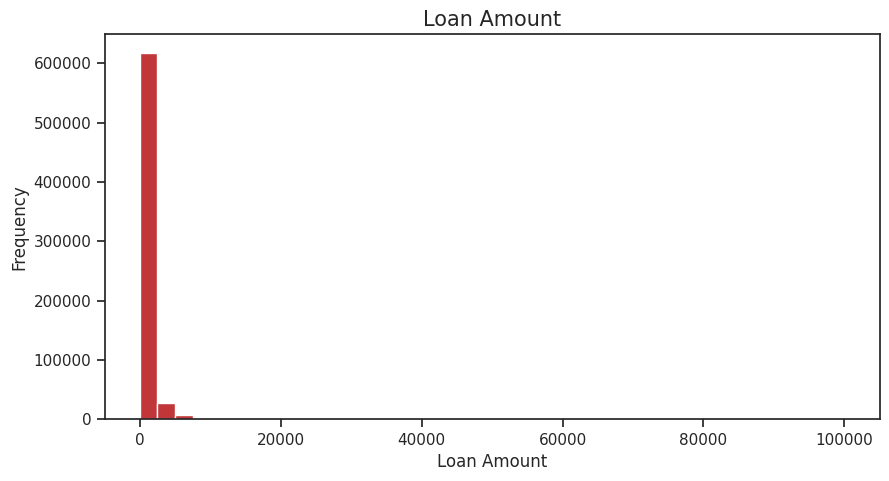

In [21]:
#Visualize loan amount on histogram
plt.figure(figsize = (10,5))
plt.title('Loan Amount', fontsize = 15)
plt.hist(kivaloans['loan_amount'], bins = 40)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### <span style="color:#288BA8; font-family:Arial;">funded_amount:</span>
   -- The amount disbursed by the field agent to the borrower(USD)
   - discover its data

In [22]:
kivaloans['funded_amount'].sum()

503188725.0

In [23]:
kivaloans['funded_amount'].describe()

count    653890.000000
mean        769.531152
std        1063.388638
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64

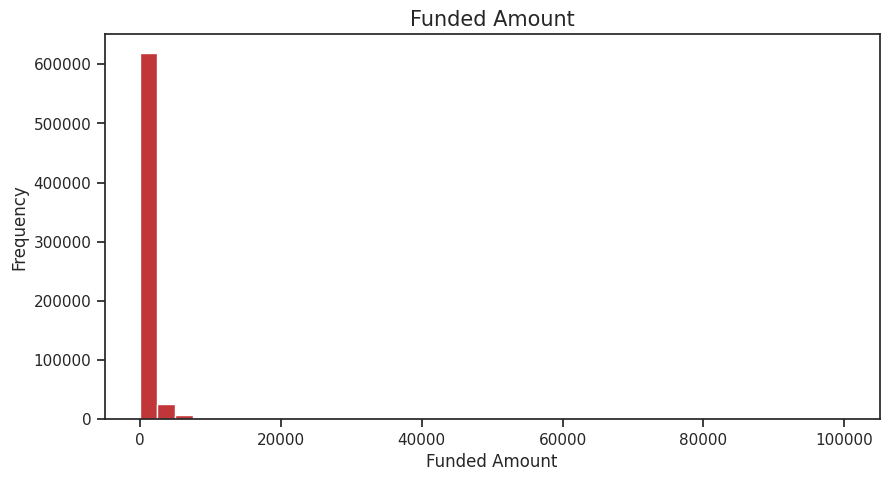

In [24]:
#Visualize funded amount on histogram
plt.figure(figsize = (10,5))
plt.title('Funded Amount', fontsize = 15)
plt.hist(kivaloans['funded_amount'], bins = 40)
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

### <span style="color:#288BA8; font-family:Arial;">activity:</span>
   -- More granular category
   - discover its data

In [25]:
kivaloans['activity'].nunique()

163

In [26]:
activity_counts= kivaloans['activity'].value_counts()
activity_counts

Farming                      72621
General Store                63105
Personal Housing Expenses    32295
Food Production/Sales        27210
Pigs                         26516
                             ...  
Technology                       6
Celebrations                     5
Event Planning                   5
Energy                           3
Adult Care                       2
Name: activity, Length: 163, dtype: int64

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">This shows that the field of Farming is the most targeted field for the borrower category</span>

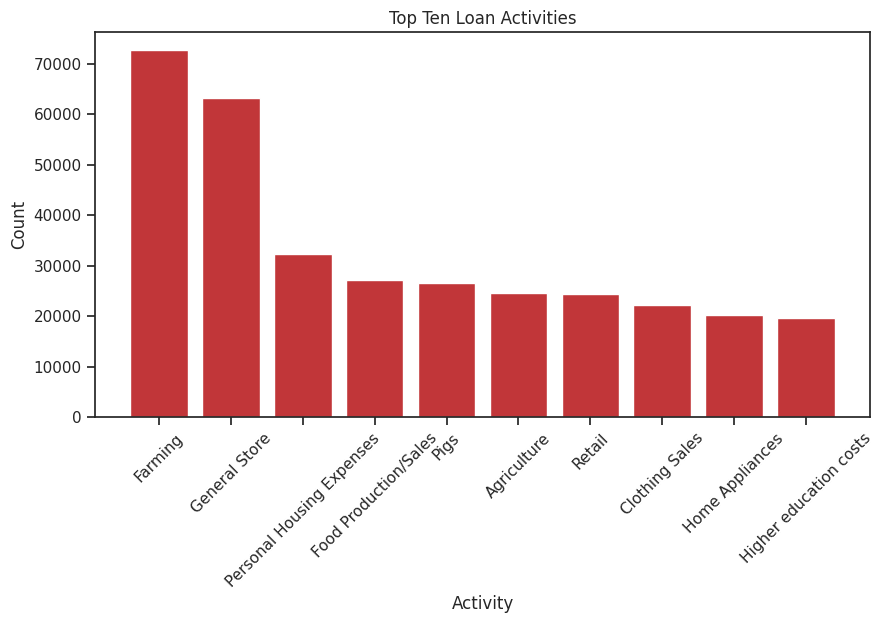

In [27]:
# Plot a bar chart for top ten activities
plt.figure(figsize = (10,5))
plt.bar(activity_counts.index[:10], activity_counts[:10])
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top Ten Loan Activities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">sector:</span>
   -- High level category
   - discover its data

In [28]:
kivaloans['sector'].unique()

array(['Food', 'Transportation', 'Arts', 'Agriculture', 'Services',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [29]:
sector_counts= kivaloans['sector'].value_counts()
sector_counts

Agriculture       177166
Food              133268
Retail            121326
Services           41563
Personal Use       36246
Housing            33539
Clothing           30823
Education          30681
Transportation     15248
Arts               11580
Health              9009
Manufacturing       6137
Construction        6027
Entertainment        656
Wholesale            621
Name: sector, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This proves that the field of agriculture is the most targeted field for the borrower category</span>

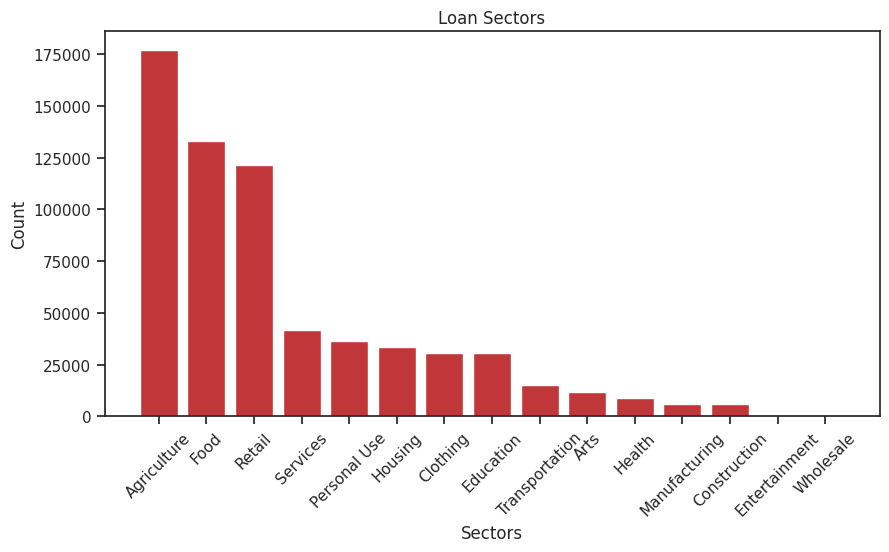

In [30]:
# Plot a bar chart for loan sectors
plt.figure(figsize = (10,5))
plt.bar(sector_counts.index, sector_counts)
plt.xlabel('Sectors')
plt.ylabel('Count')
plt.title('Loan Sectors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">use:</span>
   -- Exact usage of loan amount
   - discover its data

In [31]:
def handle_use(x):
    list_x = x.split(' ')
    if 'filter' in list_x or 'filters' in list_x:
        return 'buy water filter'
    elif 'toilet' in list_x or 'latrine' in list_x:
        return 'build sanitary toilet'
    elif 'fertilizers' in list_x or 'fertilizer' in list_x:
        return 'buy fertilizers and other farm supplies'
    elif 'pigs.' in list_x:
        return 'buy feeds and other supplies to Pigs'
    elif 'groceries' in list_x:
        return 'buy groceries to sell'
    elif 'solar' in list_x:
        return 'buy solar'
    elif 'ingredients' in list_x:
        return 'buy ingredients forfood production business'
    elif 'merchandise' in list_x:
        return 'buy enough merchandise to sell at markets'
    elif 'clothing' in list_x or 'clothing,' in list_x:
        return 'clothing to sell'
    elif 'clothing' in list_x:
        return 'clothing to sell'
    elif 'livestock' in list_x or 'livestock.' in list_x:
        return 'buy feeds and other supplies to livestock'
    elif 'construction ' in list_x:
        return 'purchase building materials and construction labor'
    elif 'farm' in list_x:
        return 'buy farm inputs'
    else:
        return x

In [32]:
kivaloans['use']= kivaloans['use'].apply(handle_use)

In [33]:
kivaloans['use'].value_counts().head(20)

buy fertilizers and other farm supplies                          39852
buy water filter                                                 17557
clothing to sell                                                 14687
buy groceries to sell                                            14152
buy ingredients forfood production business                      14100
buy farm inputs                                                  13759
buy feeds and other supplies to livestock                         9228
build sanitary toilet                                             8849
buy feeds and other supplies to Pigs                              8189
buy solar                                                         7021
buy enough merchandise to sell at markets                         5242
to buy feeds and other supplies to raise her pigs                 1027
to buy fishing gear and other equipment.                           688
to buy feed and vitamins for her pigs                              621
to pay

In [34]:
use_counts= kivaloans['use'].value_counts().head(10)
use_counts.columns=['use', 'count']
use_counts

buy fertilizers and other farm supplies        39852
buy water filter                               17557
clothing to sell                               14687
buy groceries to sell                          14152
buy ingredients forfood production business    14100
buy farm inputs                                13759
buy feeds and other supplies to livestock       9228
build sanitary toilet                           8849
buy feeds and other supplies to Pigs            8189
buy solar                                       7021
Name: use, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that buy fertilizers and other farm supplies is one of the most common reasons for taking these loans and this proves that the field of agriculture is the most targeted field for the borrower category</span>

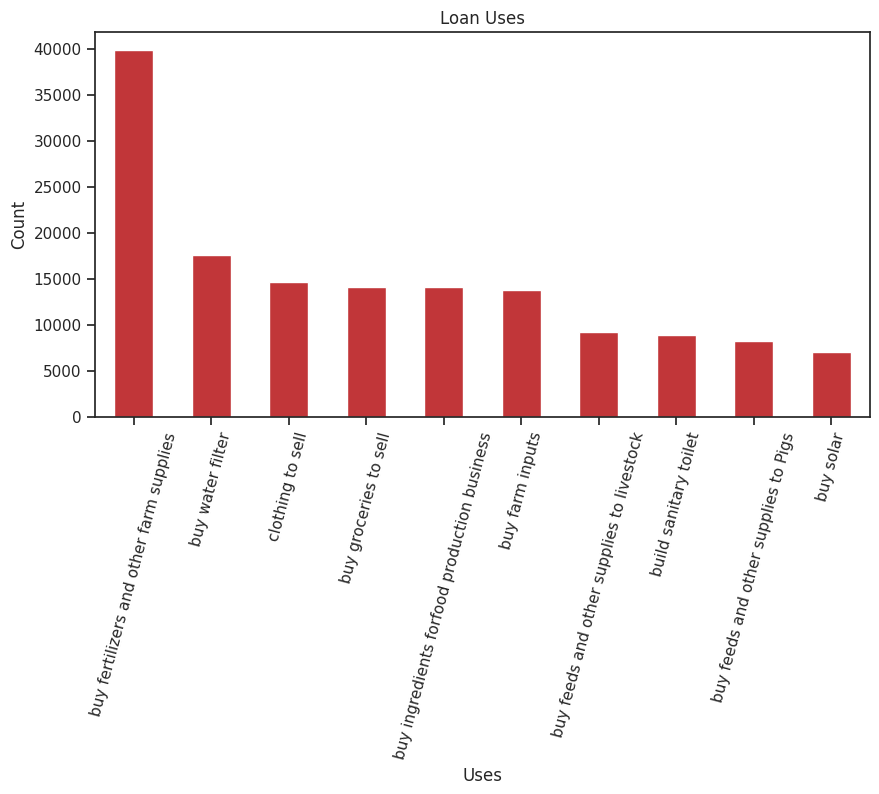

In [35]:
plt.figure(figsize = (10,5))
use_counts.plot(kind='bar')
plt.xlabel('Uses')
plt.ylabel('Count')
plt.title('Loan Uses')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">country_code:</span>
   -- ISO country code of country in which loan was disbursed
   - discover its data

In [36]:
kivaloans['country_code'].value_counts()

PH    160361
KE     67106
SV     39320
KH     34809
PK     26853
       ...  
VU         4
AF         2
MR         1
CI         1
BT         1
Name: country_code, Length: 83, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the Philippines is one of the most countries that takes loans, followed by Kenya</span>

### <span style="color:#288BA8; font-family:Arial;">country:</span>
   -- Full country name of country in which loan was disbursed
   - discover its data

In [37]:
kivaloans['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Saint Vincent and the Grenadines',
       "Lao People's Democratic Republic

In [38]:
kivaloans['country'].nunique()

84

In [39]:
kivaloans['country'].value_counts()

Philippines      160361
Kenya             67106
El Salvador       39320
Cambodia          34809
Pakistan          26853
                  ...  
Vanuatu               4
Afghanistan           2
Mauritania            1
Cote D'Ivoire         1
Bhutan                1
Name: country, Length: 84, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This proves that the Philippines is one of the most countries that takes loans, followed by Kenya</span>

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> The country_code column is the same as country column so i will drop it to minimaize the dataframe</span>

In [40]:
kivaloans = kivaloans.drop('country_code', axis=1)

### <span style="color:#288BA8; font-family:Arial;">region:</span>
   -- Full region name within the country
   - discover its data

In [41]:
kivaloans['region'].value_counts()

El Salvador                         19697
Kaduna                              10000
Lahore                               7178
Rwanda                               6123
Rawalpindi                           4496
                                    ...  
Brgy. Nagacadan, Kiangan, Ifugao        1
Jghali                                  1
San Miguel, Iloilo                      1
Candelaria, Candelaria, Campeche        1
alejandria                              1
Name: region, Length: 12732, dtype: int64

### <span style="color:#288BA8; font-family:Arial;">currency:</span>
   -- The currency in which the loan was disbursed
   - discover its data

In [42]:
kivaloans['currency'].unique()

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'LAK', 'MMK', 'MWK', 'ZWD', 'MDL', 'SSP', 'SBD', 'CNY', 'EGP',
       'MGA', 'NAD', 'LSL', 'THB'], dtype=object)

In [43]:
kivaloans['country'].nunique()

84

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> The same number of unique values as country column so This column shows the currency of each country, but loans are disbursed in dollars</span>

### <span style="color:#288BA8; font-family:Arial;">partner_id:</span>
   -- ID of partner organization
   - convert datatype to 'object'
   - discover its data

In [44]:
#convert datatype to 'object'
kivaloans['partner_id']= kivaloans['partner_id'].astype(int)
kivaloans['partner_id']= kivaloans['partner_id'].astype(object)

In [45]:
kivaloans['partner_id'].nunique()

364

In [46]:
kivaloans['partner_id'].value_counts()

145    107180
199     19263
311     15830
177     15639
156     15419
        ...  
506         1
348         1
508         1
509         1
536         1
Name: partner_id, Length: 364, dtype: int64

In [47]:
kivaloans['partner_id'].nunique()

364

### <span style="color:#288BA8; font-family:Arial;">posted_time:</span>
   -- The time at which the loan is posted on Kiva by the field agent
   - convert to Date/Time
   - discover its data

In [48]:
# convert to datetime type
kivaloans['posted_time']= pd.to_datetime(kivaloans['posted_time'])

In [49]:
# start date
kivaloans['posted_time'].dt.date.min()

datetime.date(2014, 1, 1)

In [50]:
# end date
kivaloans['posted_time'].dt.date.max()

datetime.date(2017, 7, 26)

In [51]:
# start time
kivaloans['posted_time'].dt.time.min()

datetime.time(0, 0)

In [52]:
# end time
kivaloans['posted_time'].dt.time.max()

datetime.time(23, 59, 59)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the starting of post loans was in 1/1/2014 and the end is 26/7/2017 and posting was 24 hours in aday</span>

### <span style="color:#288BA8; font-family:Arial;">disbursed_time:</span>
   -- The time at which the loan is disbursed by the field agent to the borrower
   - convert to Date/Time
   - discover its data

In [53]:
# convert todatetime
kivaloans['disbursed_time']= pd.to_datetime(kivaloans['disbursed_time'])

In [54]:
# start date
kivaloans['disbursed_time'].dt.date.min()

datetime.date(2013, 12, 2)

In [55]:
# end date
kivaloans['disbursed_time'].dt.date.max()

datetime.date(2017, 9, 30)

In [56]:
# start time
kivaloans['disbursed_time'].dt.time.min()

datetime.time(0, 0)

In [57]:
# end time
kivaloans['posted_time'].dt.time.max()

datetime.time(23, 59, 59)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the starting of disbursing the loans was in 2/12/2013 and the end is 30/9/2017 and disbursing was 24 hours in aday</span>

In [58]:
# This for dash board usage
kivaloans['disbursed_date'] = kivaloans['disbursed_time'].dt.date

### <span style="color:#288BA8; font-family:Arial;">funded_time:</span>
   -- The time at which the loan posted to Kiva gets funded by lenders completely
   - convert to Date/Time
   - discover its data

In [59]:
# convert to datetime
kivaloans['funded_time']= pd.to_datetime(kivaloans['funded_time'])

In [60]:
# start date
kivaloans['funded_time'].dt.date.min()

datetime.date(2014, 1, 1)

In [61]:
# end date
kivaloans['funded_time'].dt.date.max()

datetime.date(2017, 7, 26)

In [62]:
# start time
kivaloans['funded_time'].dt.time.min()

datetime.time(0, 0)

In [63]:
# end time
kivaloans['funded_time'].dt.time.max()

datetime.time(23, 59, 59)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> as posted_time column was started in 1/1/2014 and ended in 26/7/2017 and was 24 hours in aday</span>

### <span style="color:#288BA8; font-family:Arial;">term_in_months:</span>
   -- The duration for which the loan was disbursed in months
   - rename to loan_months
   - convert to 'int'
   - discover its data

In [64]:
# rename term_in_mouths column
kivaloans.rename(columns={'term_in_months': 'loan_months'}, inplace=True)

In [65]:
# convert datatype to 'int'
kivaloans['loan_months']= kivaloans['loan_months'].astype(int)

In [66]:
kivaloans['loan_months'].unique()

array([ 12,  11,  43,  14,  13,  10,   8,   5,  20,   7,  17,  15,   9,
        39,  23,  26,   6,  22,  25,  27,  16,  52,  18,  19,  28,  62,
        32,  21,  50,  35,  38,  72, 137,  49,  33,  42,  29,  37,  36,
        51,  24, 113,  30,   4,  79,  31,  44,  74,  34,  48, 114,  40,
       124, 104,  63,  85,  78,  70,  86,  61,  60,  67,  55,  53,   3,
        41,  68,   2, 143,  77, 130,  45, 134, 107, 142, 148, 111,  56,
       122, 141, 110,  81, 106,  54, 147, 112,  59, 145, 121, 109,  80,
        47,  97,  75, 101, 128,  98,  87,  66,  46, 125,  76,  73, 120,
       144, 118, 131,  65, 108,  58, 123,  84,  99,  82,  92,  69,  91,
        57,  90,  93, 129,  89,  88,  64, 126, 138, 158,  83, 100, 105,
       132,  96,  71, 127, 135, 133,  95, 154, 156,  94, 115, 102, 116,
       136, 103, 139, 146])

In [67]:
kivaloans['loan_months'].value_counts()

14     165844
8      142519
11      40609
7       32418
13      30318
        ...  
158         1
111         1
147         1
128         1
146         1
Name: loan_months, Length: 147, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that within a year the loan disbursement is often completed</span>

### <span style="color:#288BA8; font-family:Arial;">lender_count:</span>
   -- The total number of lenders that contributed to this loan
   - discover its data

In [68]:
# number of lender distribution
kivaloans['lender_count'].value_counts()

8       33616
7       31921
9       31863
1       31422
5       29727
        ...  
1167        1
1302        1
397         1
919         1
969         1
Name: lender_count, Length: 483, dtype: int64

In [69]:
# total number of lenders
kivaloans['lender_count'].sum()

13268532

In [70]:
# maximum number of lenders per loan
kivaloans['lender_count'].max()

2986

In [71]:
# minimum number of lenders per loan
kivaloans['lender_count'].min()

0

### <span style="color:#288BA8; font-family:Arial;">repayment_interval:</span>
   -- the method for repaying the loan
   - convert datatype to 'object'
   - discover its data

In [72]:
kivaloans['repayment_interval']= kivaloans['repayment_interval'].astype(object)

In [73]:
kivaloans['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly'], dtype=object)

In [74]:
kivaloans['repayment_interval'].value_counts()

monthly      334195
irregular    252039
bullet        67656
Name: repayment_interval, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that monthly payment is prevailing</span>

### <span style="color:#288BA8; font-family:Arial;">borrower_genders:</span>
   -- Comma separated M,F letters, where each instance represents a single male/female in the group
   - discover its data
   - split it to female and male

In [75]:
# borrower_genders values distribution
kivaloans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                          415840
male                                                                                                                                                                                                                            132281
female, female                                                                                                                                                                                                                   12163
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                                              

In [76]:
# number of unique values
kivaloans['borrower_genders'].nunique()

11297

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows cells with many values for females and males, and I plan to add a borrower_count column which has the number of females and the number of males in each cell collected in the form of a tuple</span>

In [77]:
# function to count the occurance of female and male
def count_category(cell):
    if cell=='female':
        female_count=1
        male_count=0
    elif cell=='male':
        female_count=0
        male_count=1
    else:
        counts = cell.split(', ')
        female_count = counts.count('female')
        male_count = counts.count('male')
    return female_count + male_count

In [78]:
#Now i will add gender_count column to kivloans dataframe
kivaloans['borrower_count']= kivaloans['borrower_genders'].apply(count_category)

In [79]:
# confirm processing
kivaloans['borrower_count'].nunique()

50

In [80]:
kivaloans['borrower_genders'] = kivaloans['borrower_genders'].apply(lambda x: 'both' if x not in(['female', 'male']) else x)

In [81]:
kivaloans['borrower_genders'].unique()

array(['female', 'both', 'male'], dtype=object)

<span style="color:navy; font-family:Ari4al; font-weight: bold;">Now the borrower_count column  has been added to our data and the borrower_gender column has been handled</span>

In [82]:
kivaloans.shape

(653890, 19)

In [83]:
kivaloans.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
loan_months           0
lender_count          0
borrower_genders      0
repayment_interval    0
disbursed_date        0
borrower_count        0
dtype: int64

In [84]:
kivaloans.duplicated().sum()

0

In [85]:
kivaloans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 653890 entries, 2014-01-01 to 2017-07-26
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  653890 non-null  object             
 1   funded_amount       653890 non-null  float64            
 2   loan_amount         653890 non-null  float64            
 3   activity            653890 non-null  object             
 4   sector              653890 non-null  object             
 5   use                 653890 non-null  object             
 6   country             653890 non-null  object             
 7   region              653890 non-null  object             
 8   currency            653890 non-null  object             
 9   partner_id          653890 non-null  object             
 10  posted_time         653890 non-null  datetime64[ns, UTC]
 11  disbursed_time      653890 non-null  datetime64[ns, UTC]
 12  

## <span style="color:Brown; font-family:Arial;">EDA Questions:</span>

### <span style="color:blue; font-family:Arial;">Time:</span>
   - what is the total loans per year for funded and loan amounts?
   - what is the total loans per month for funded and loan amounts for each year?
   - what is the distribution of sectors per year?
### <span style="color:blue; font-family:Arial;">Sectors:</span>
   - According to activities, What is the Total loan amount for gender?
   - What sector got the most loans?
   - For each sector, What is the distribution of borrower_gender?
   - For the top sector, what activity had the highest amount of loans?
### <span style="color:blue; font-family:Arial;">Country:</span>
   - What country got the most loans?
   - For each country, Which region had the highest loan amounts?
   - For each country, which common repayment interval?
   - For each country, What is the distribution of borrower_gender?
   - For each country, what is the most common sectors?
### <span style="color:blue; font-family:Arial;">Partners:</span>
   - Who are the most dominant field partners?
   - For each country, What is the number of partners according to sectors?
### <span style="color:blue; font-family:Arial;">group_borrower data:</span>
   - What is the most sectors have grouped_borrower?
   - What is the most countries have grouped_borrower?
   - What is the most use have grouped_borrower?
   - What is the common repayment intervals for grouped_borrower?
   - what is the total loans per year for grouped_borrower?
    

## <span style="color:#288BA8; font-family:Arial;">Time:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per year for funded and loan amounts?</span>

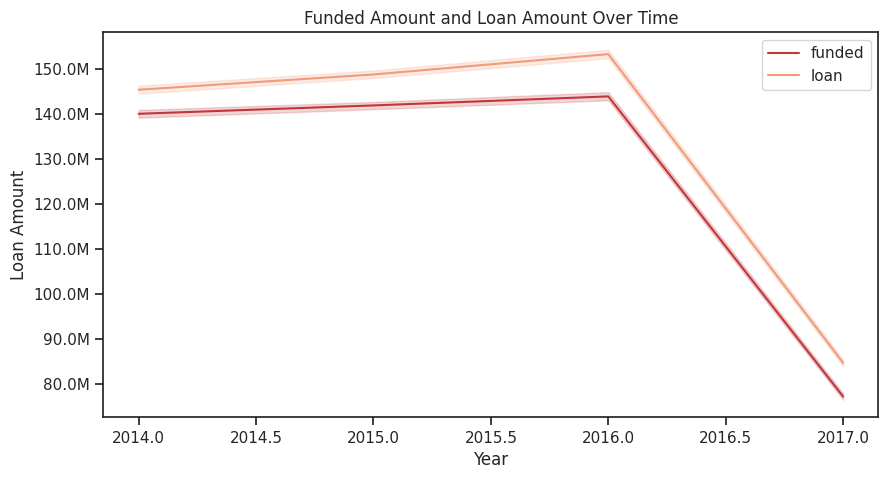

In [86]:
plt.figure(figsize = (10,5))
# Plot line chart for 'funded_amount'
sns.lineplot(data=kivaloans, x=kivaloans.index.year, y='funded_amount', estimator=sum, label='funded')

# Plot line chart for 'loan_amount'
sns.lineplot(data=kivaloans, x=kivaloans.index.year, y='loan_amount', estimator=sum, label='loan')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.title('Funded Amount and Loan Amount Over Time')
plt.legend()
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per month for funded and loan amounts for each year?</span>

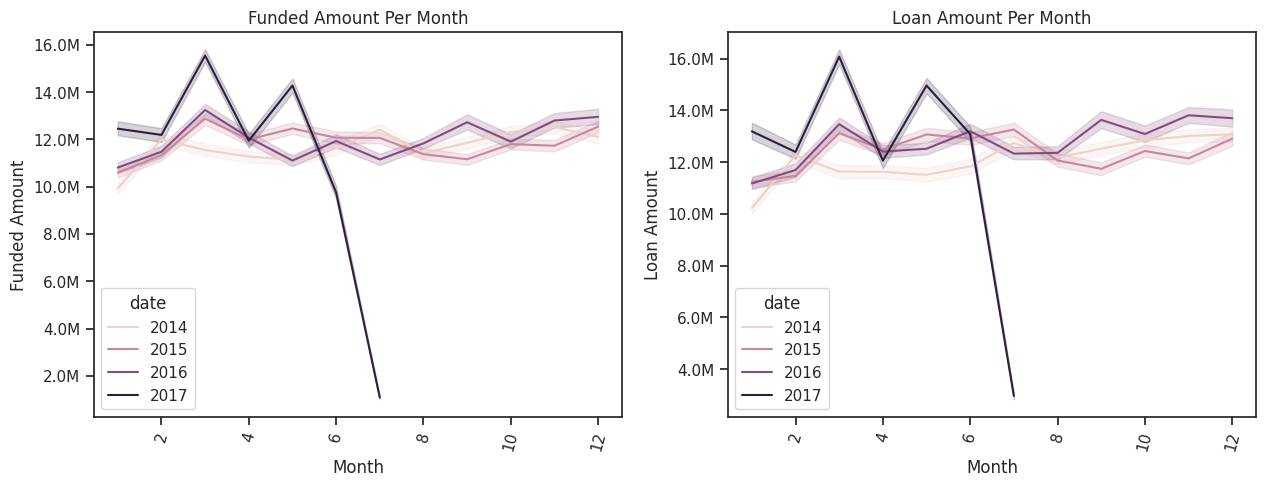

In [120]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.lineplot(data = kivaloans, x = kivaloans.index.month, y = 'funded_amount', estimator=sum, hue=kivaloans.index.year)
plt.title('Funded Amount Per Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation = 75)
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.subplot(1,2,2)
sns.lineplot(data = kivaloans, x = kivaloans.index.month, y = 'loan_amount', estimator=sum, hue=kivaloans.index.year)
plt.title("Loan Amount Per Month")
plt.xlabel('Month')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 75)
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loan_amount of each sector per year?</span>

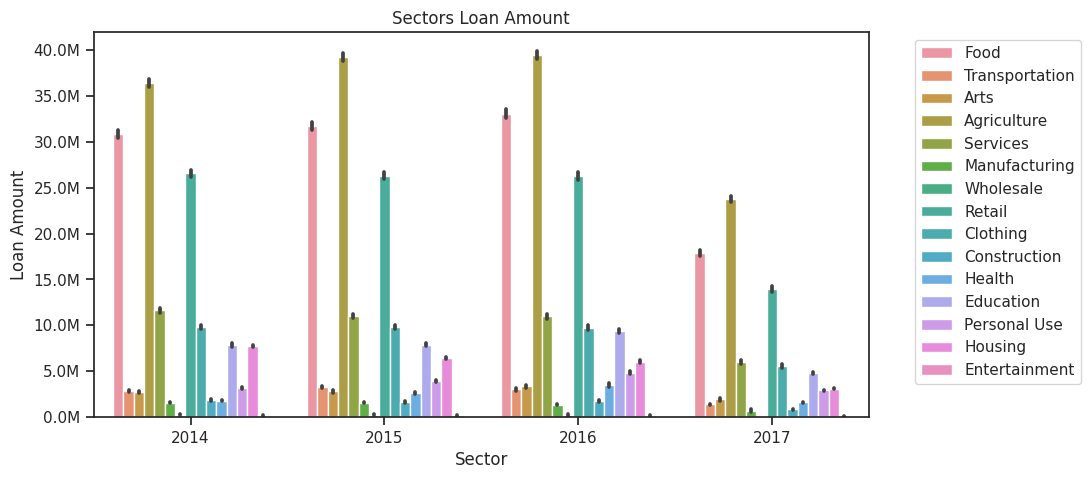

In [121]:
plt.figure(figsize = (10,5))
# Plot bar chart for sectors loan amount per year
sns.barplot(data=kivaloans, x=kivaloans.index.year, y='loan_amount', estimator=sum, hue='sector')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Sectors Loan Amount')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Country:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What country got the most loans?</span>

In [87]:
country_loan_amount = kivaloans.groupby('country')['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
country_loan_amount

,country,loan_amount
0,Philippines,55301500.0
1,Kenya,32636750.0
2,Peru,30708825.0
3,Paraguay,29514025.0
4,El Salvador,26251050.0
5,Cambodia,19840425.0
6,Bolivia,19695725.0
7,Rwanda,16614275.0
8,Uganda,15209525.0
9,Tajikistan,14976450.0


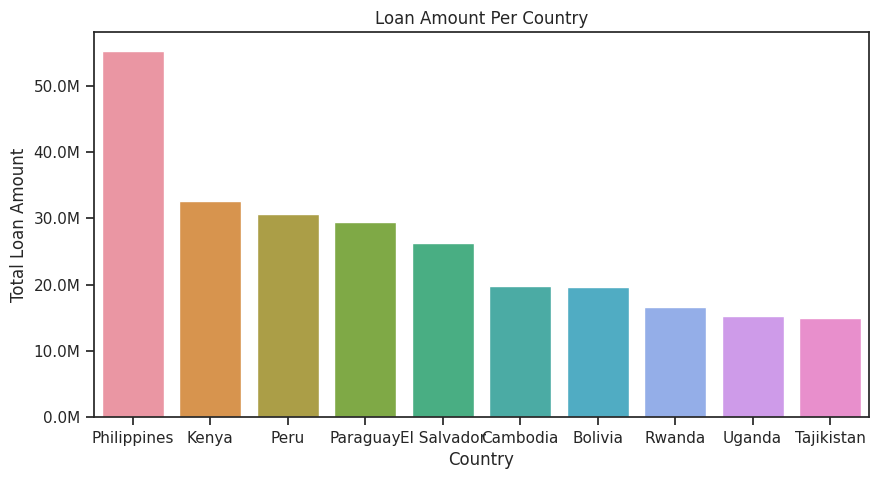

In [102]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=country_loan_amount, x='country', y='loan_amount')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per Country')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, Which region had the highest loan amounts?</span>

In [88]:
# Group the data by country and region, and calculate the sum of loan amounts
grouped_data = kivaloans.groupby(['country','region'])['loan_amount'].sum().sort_values(ascending=False).reset_index()

# Find the region with the highest loan amount for each country
max_loan_regions = grouped_data.loc[grouped_data.groupby('country')['loan_amount'].idxmax()]\
     .sort_values(by='loan_amount', ascending=False).head(10).reset_index(drop=True)

# Display the result
max_loan_regions

,country,region,loan_amount
0,Rwanda,Rwanda,15931500.0
1,El Salvador,El Salvador,12588575.0
2,The Democratic Republic of the Congo,"Goma, North Kivu province",7397975.0
3,Senegal,Senegal,6991200.0
4,Bolivia,La Paz / El Alto,6838300.0
5,Peru,Cusco,6222075.0
6,Tanzania,Dar es Salaam,5113875.0
7,Pakistan,Lahore,3984575.0
8,Vietnam,Thanh Hoá,3718125.0
9,Iraq,Iraq,2618450.0


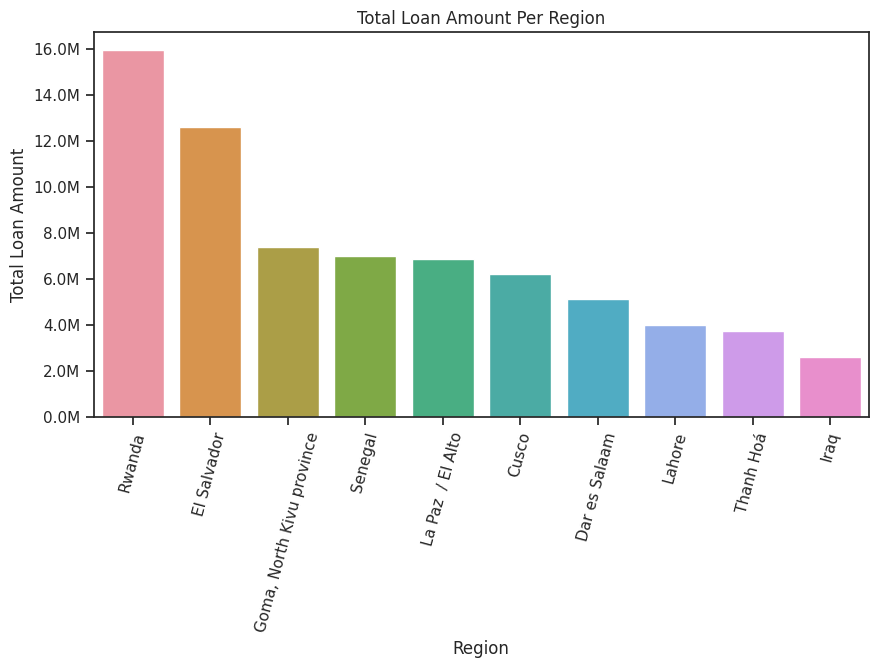

In [103]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=max_loan_regions, x='region', y='loan_amount')

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount Per Region')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, which common repayment interval?</span>

In [104]:
common_repayment = kivaloans.groupby(['country','repayment_interval']).size().sort_values(ascending=False).reset_index(name='count').head(20)
common_repayment

,country,repayment_interval,count
0,Philippines,irregular,144899
1,Kenya,monthly,43058
2,Cambodia,monthly,34380
3,El Salvador,monthly,29329
4,Pakistan,monthly,20555
5,Tajikistan,monthly,19355
6,Kenya,irregular,14884
7,Philippines,monthly,13719
8,Colombia,bullet,13382
9,Uganda,monthly,13032


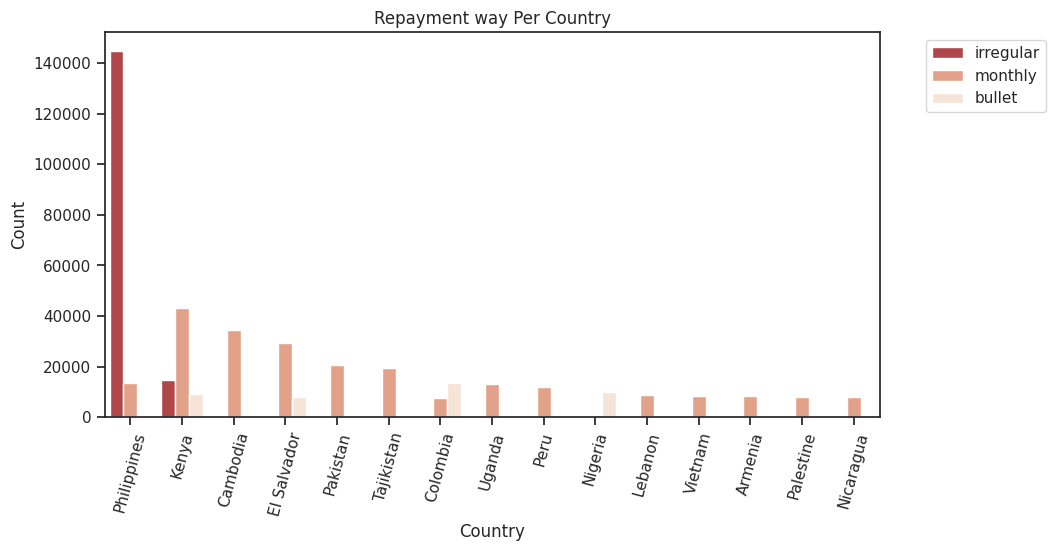

In [105]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=common_repayment, x='country', y='count', hue='repayment_interval')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Repayment way Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, What is the distribution of borrower_gender?</span>

In [106]:
country_gender = kivaloans.groupby(['country','borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
country_gender

,country,borrower_genders,count
0,Philippines,female,151984
1,Kenya,female,41963
2,Cambodia,both,25641
3,Pakistan,female,25065
4,El Salvador,female,23434
5,El Salvador,male,15867
6,Kenya,male,14584
7,Tajikistan,female,14525
8,Colombia,female,12858
9,Kenya,both,10559


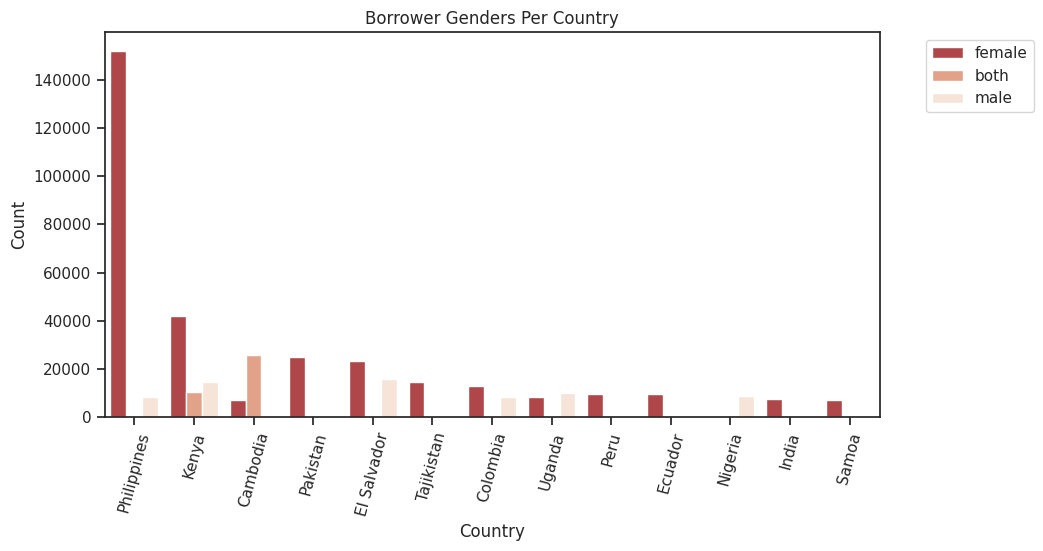

In [107]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per countries
sns.barplot(data=country_gender, x='country', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Borrower Genders Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, what is the most common sectors?</span>

In [108]:
common_sectors = kivaloans.groupby(['country','sector']).size().sort_values(ascending=False).reset_index(name='count').head(20)
common_sectors

,country,sector,count
0,Philippines,Retail,53560
1,Philippines,Food,42684
2,Philippines,Agriculture,36762
3,Kenya,Agriculture,31747
4,Cambodia,Personal Use,18229
5,El Salvador,Agriculture,13864
6,Kenya,Food,12618
7,Cambodia,Agriculture,10556
8,Kenya,Retail,8455
9,El Salvador,Food,8156


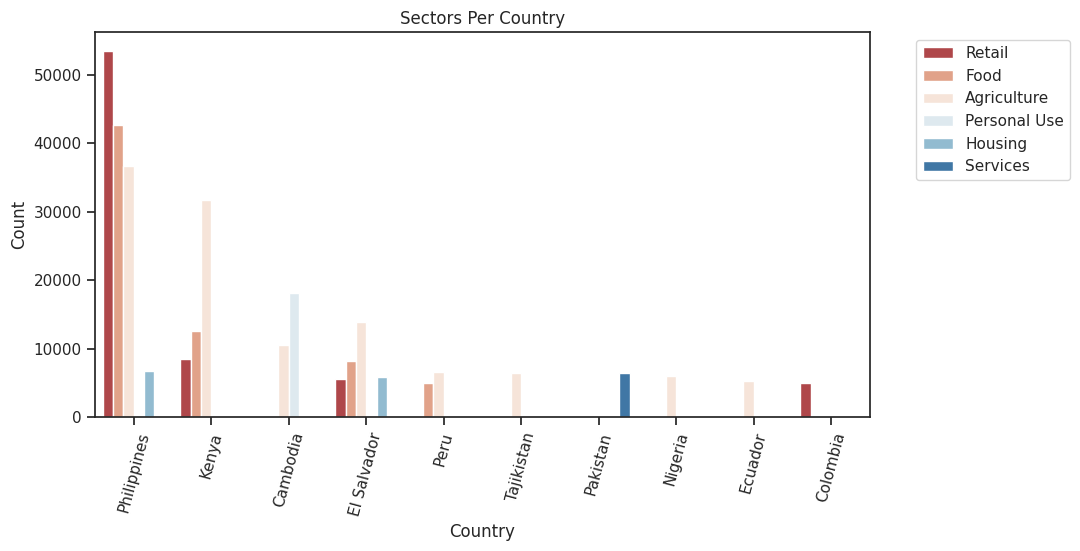

In [122]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst sectors per countries
sns.barplot(data=common_sectors, x='country', y='count', hue='sector')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Sectors Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Sectors:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">According to activities, What is the Total loan amount for gender?</span>

In [109]:
#for data with one borrower
gender_activities = kivaloans.groupby(['activity', 'borrower_genders'])['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
gender_activities

,activity,borrower_genders,loan_amount
0,General Store,female,24222475.0
1,Farming,both,19677600.0
2,Farming,female,19498275.0
3,Personal Housing Expenses,female,12995700.0
4,Retail,both,12749450.0
5,Farming,male,12242425.0
6,Clothing Sales,female,11320325.0
7,Clothing Sales,both,10885900.0
8,Higher education costs,female,10588475.0
9,Food Production/Sales,female,10138375.0


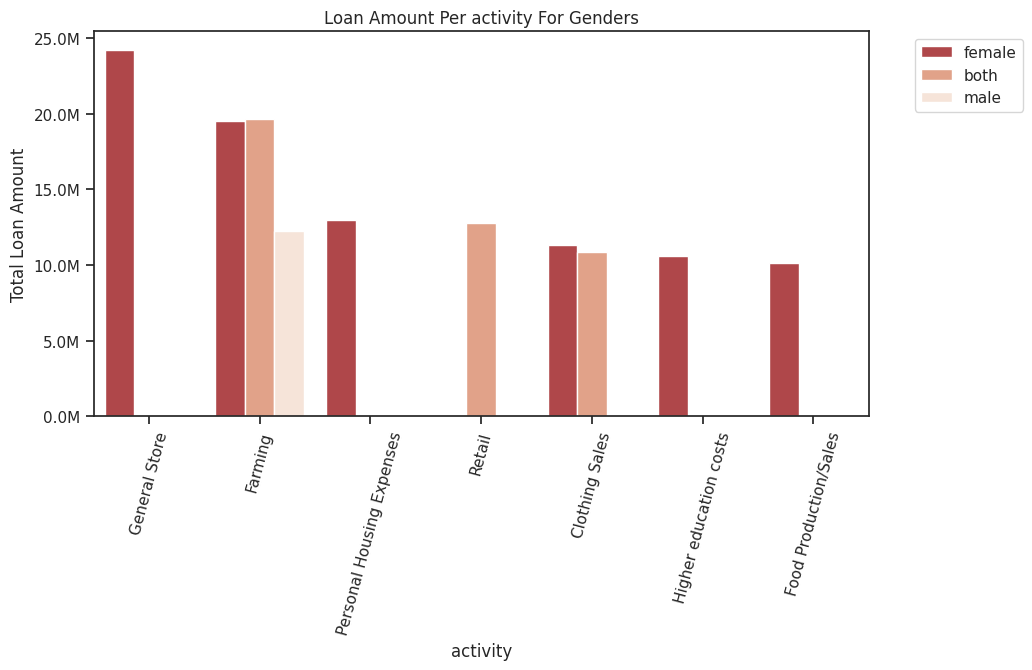

In [123]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=gender_activities, x='activity', y='loan_amount', hue='borrower_genders')

# Set the labels and title
plt.xlabel('activity')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per activity For Genders')
plt.xticks(rotation = 75)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What sector got the most loans?</span>

In [110]:
sector_loan_amount = kivaloans.groupby('sector')['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
sector_loan_amount

,sector,loan_amount
0,Agriculture,138823575.0
1,Food,113522400.0
2,Retail,93038475.0
3,Services,39650200.0
4,Clothing,34981300.0
5,Education,30006525.0
6,Housing,23377975.0
7,Personal Use,14880400.0
8,Arts,10854550.0
9,Transportation,10613425.0


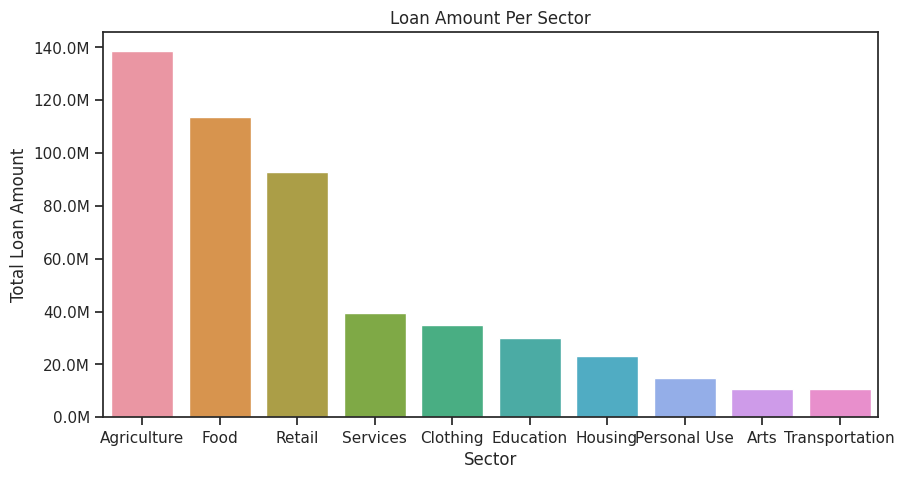

In [124]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=sector_loan_amount, x='sector', y='loan_amount')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per Sector')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each sector, What is the distribution of borrower_gender?</span>

In [111]:
sector_gender = kivaloans.groupby(['sector','borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
sector_gender

,sector,borrower_genders,count
0,Agriculture,female,97831
1,Food,female,96777
2,Retail,female,94365
3,Agriculture,male,47849
4,Agriculture,both,31486
5,Services,female,28065
6,Housing,female,23009
7,Food,both,22573
8,Clothing,female,21280
9,Personal Use,both,19555


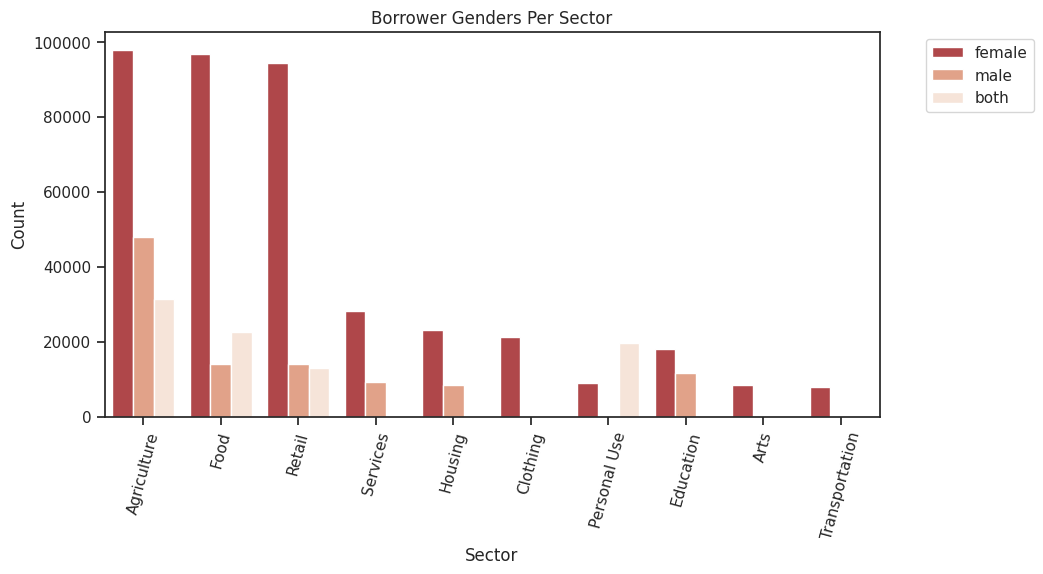

In [125]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per sectors
sns.barplot(data=sector_gender, x='sector', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Borrower Genders Per Sector')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For the top sector, what activity had the highest amount of loans?</span>

In [112]:
# Agriculture sector data
top_sector= kivaloans[kivaloans['sector']=='Agriculture']

In [113]:
# Agriculture sector activities grouping data
sector_loan_activity = top_sector.groupby('activity')[['loan_amount']].sum().sort_values(by='loan_amount',ascending= False).reset_index().head(10)
sector_loan_activity

,activity,loan_amount
0,Farming,51418300.0
1,Agriculture,23832250.0
2,Livestock,14705125.0
3,Pigs,12479900.0
4,Animal Sales,10472700.0
5,Poultry,8192075.0
6,Cattle,7928750.0
7,Dairy,5166300.0
8,Farm Supplies,3396125.0
9,Flowers,698625.0


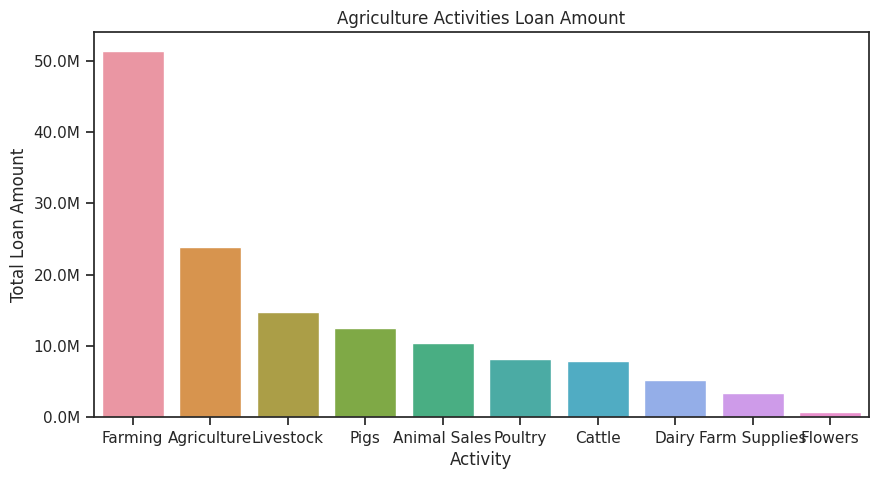

In [126]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst activities loan amount
sns.barplot(data=sector_loan_activity, x='activity', y='loan_amount')

# Set the labels and title
plt.xlabel('Activity')
plt.ylabel('Total Loan Amount')
plt.title('Agriculture Activities Loan Amount')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Partners:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">Who are the most dominant field partners?</span>

In [89]:
kivaloans['partner_id'].value_counts()

145    107180
199     19263
311     15830
177     15639
156     15419
        ...  
506         1
348         1
508         1
509         1
536         1
Name: partner_id, Length: 364, dtype: int64

In [90]:
partners.sample()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
222,15,South Pacific Business Development (SPBD) - Samoa,General Financial Inclusion,a1050000002Y8pD,Seasonal Worker,Samoa,No,Matatufu,"(-14.0166667, -171.5333333)",WSM,...,775,"Matatufu, Samoa","[(-14.0391027, -171.5829484)]",Matatufu; Atua; Samoa,"(-14.0391027, -171.5829484)",-14.039103,-171.582948,WSM,NaN,90.0


In [91]:
partners[partners['Partner ID']==145]['Field Partner Name']

7290    Negros Women for Tomorrow Foundation (NWTF)
7291    Negros Women for Tomorrow Foundation (NWTF)
7292    Negros Women for Tomorrow Foundation (NWTF)
7293    Negros Women for Tomorrow Foundation (NWTF)
7294    Negros Women for Tomorrow Foundation (NWTF)
                           ...                     
7585    Negros Women for Tomorrow Foundation (NWTF)
7586    Negros Women for Tomorrow Foundation (NWTF)
7587    Negros Women for Tomorrow Foundation (NWTF)
7588    Negros Women for Tomorrow Foundation (NWTF)
7589    Negros Women for Tomorrow Foundation (NWTF)
Name: Field Partner Name, Length: 300, dtype: object

<span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that Negros Women for Tomorrow Foundation (NWTF) institution is the most dominant field partners</span>

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, What is the number of partners according to sectors?</span>

In [114]:
country_sector_partener= kivaloans.groupby(['country', 'sector'])['partner_id'].count()\
    .sort_values(ascending=False).reset_index(name='count').head(20)
country_sector_partener

,country,sector,count
0,Philippines,Retail,53560
1,Philippines,Food,42684
2,Philippines,Agriculture,36762
3,Kenya,Agriculture,31747
4,Cambodia,Personal Use,18229
5,El Salvador,Agriculture,13864
6,Kenya,Food,12618
7,Cambodia,Agriculture,10556
8,Kenya,Retail,8455
9,El Salvador,Food,8156


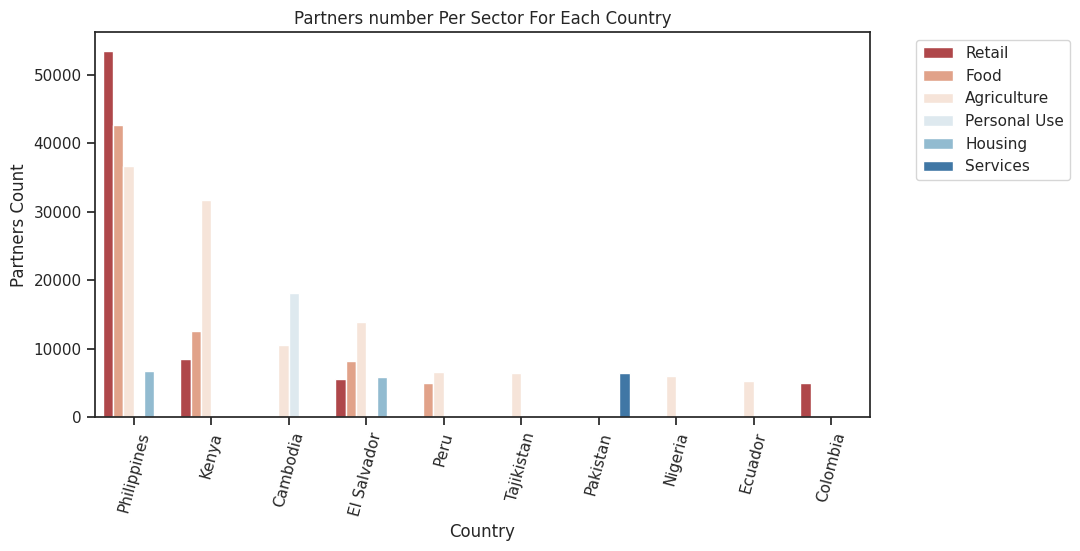

In [115]:
plt.figure(figsize = (10,5))
# Plot bar chart for Partners number Per Sector For Each Country
sns.barplot(data=country_sector_partener, x='country', y='count', hue='sector')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Partners Count')
plt.title('Partners number Per Sector For Each Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What are the sectors funded by the most dominant field partners?</span>

In [116]:
top_partner_sectors= kivaloans[kivaloans['partner_id']==145].groupby('sector')['funded_amount'].sum().sort_values(ascending=False).reset_index(name='total')
top_partner_sectors

,sector,total
0,Retail,12491425.0
1,Food,10013625.0
2,Agriculture,7125150.0
3,Housing,920550.0
4,Services,817775.0
5,Clothing,706750.0
6,Transportation,583000.0
7,Arts,474950.0
8,Manufacturing,344475.0
9,Personal Use,186825.0


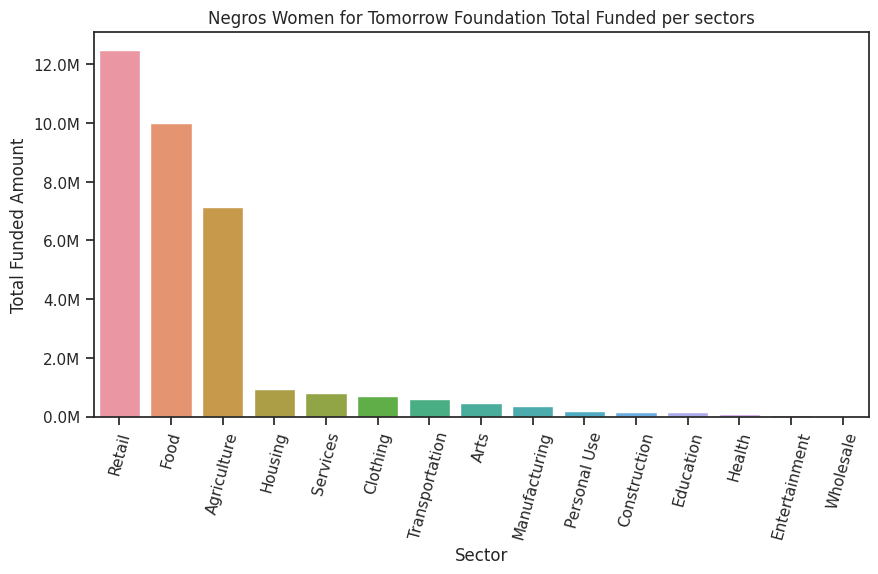

In [117]:
plt.figure(figsize = (10,5))
# Plot bar chart for Partners number Per Sector For Each Country
sns.barplot(data=top_partner_sectors, x='sector', y='total')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Total Funded Amount')
plt.title('Negros Women for Tomorrow Foundation Total Funded per sectors')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation = 75)

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Grouped Borrower:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most sectors have grouped_borrower?</span>

In [92]:
kivaloans[kivaloans['borrower_genders']=='both']['sector'].value_counts().sort_values(ascending=False)

Agriculture       31486
Food              22573
Personal Use      19555
Retail            12940
Clothing           7025
Services           4254
Housing            2194
Arts               1937
Education          1018
Health              969
Manufacturing       619
Construction        595
Transportation      515
Wholesale            53
Entertainment        36
Name: sector, dtype: int64

#### <span style="color:navy; font-family:'Gill Sans Extrabold', sans-serif; font-weight: bold;">This shows that Grouped borrowered does not related with any sectors</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most countries have grouped_borrower?</span>

In [93]:
grouped_borrower= kivaloans[kivaloans['borrower_genders']=='both']['country'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower

,index,count
0,Cambodia,25641
1,Kenya,10559
2,Paraguay,6491
3,Mali,6095
4,Peru,5139
5,Vietnam,4604
6,Guatemala,4503
7,India,3435
8,The Democratic Republic of the Congo,3008
9,Tanzania,2960


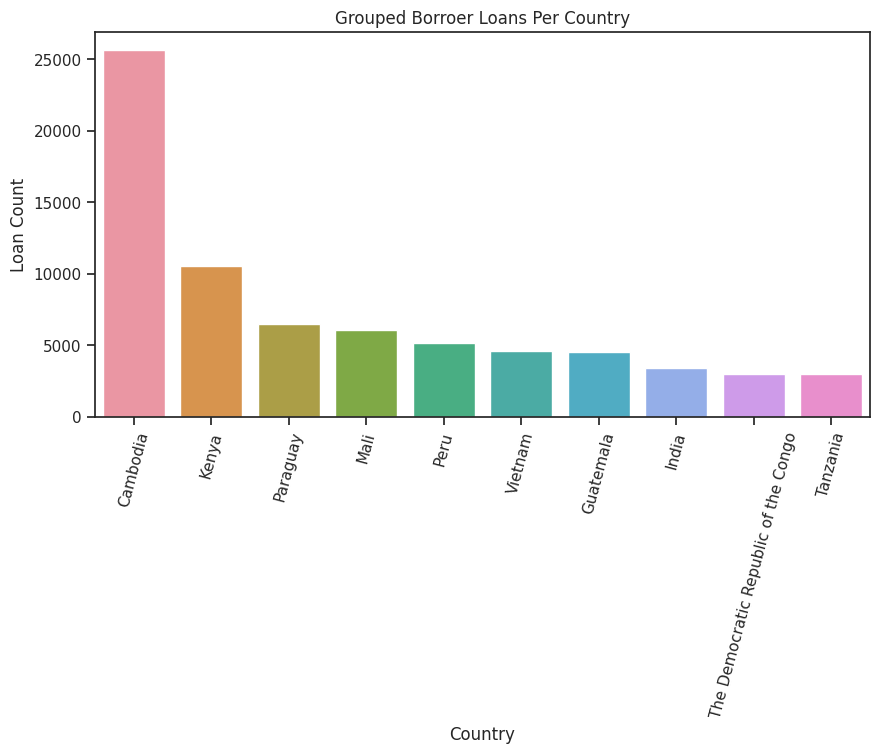

In [128]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower, x='index', y='count')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Loan Count')
plt.title('Grouped Borroer Loans Per Country')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the country of Cambodia, followed by Kenya, has the most grouped borrowed loans, and this is likely due to the decline of the currency against the dollar, as the dollar is equal to 4133.46 Cambodian riyals</span>

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">Now, We will see The Total loans amount for one borrower and grouped borrwer in both of cambodia and kenya</span>

In [94]:
one_borrower_loan= kivaloans[(kivaloans['borrower_genders']!='both')&(kivaloans['country'].isin(['Cambodia', 'Kenya']))]
one_borrower_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2015-04-21,872910,450.0,450.0,Tailoring,Services,to purchase cloth materials and sewing thread ...,Kenya,Likoni,KES,164,2015-04-21 07:18:51+00:00,2015-04-21 07:00:00+00:00,2015-05-08 00:48:30+00:00,14,14,female,irregular,2015-04-21,1


In [95]:
group_borrower_loan= kivaloans[(kivaloans['borrower_genders']=='both')&(kivaloans['country'].isin(['Cambodia', 'Kenya']))]
group_borrower_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2014-09-10,766399,500.0,500.0,Fruits & Vegetables,Food,To buy vegetable seeds and fertilizer.,Cambodia,"Banteay Meanchey Province, Mongkul Borey District",KHR,204,2014-09-10 06:26:58+00:00,2014-08-11 07:00:00+00:00,2014-10-18 16:48:56+00:00,14,14,both,monthly,2014-08-11,2


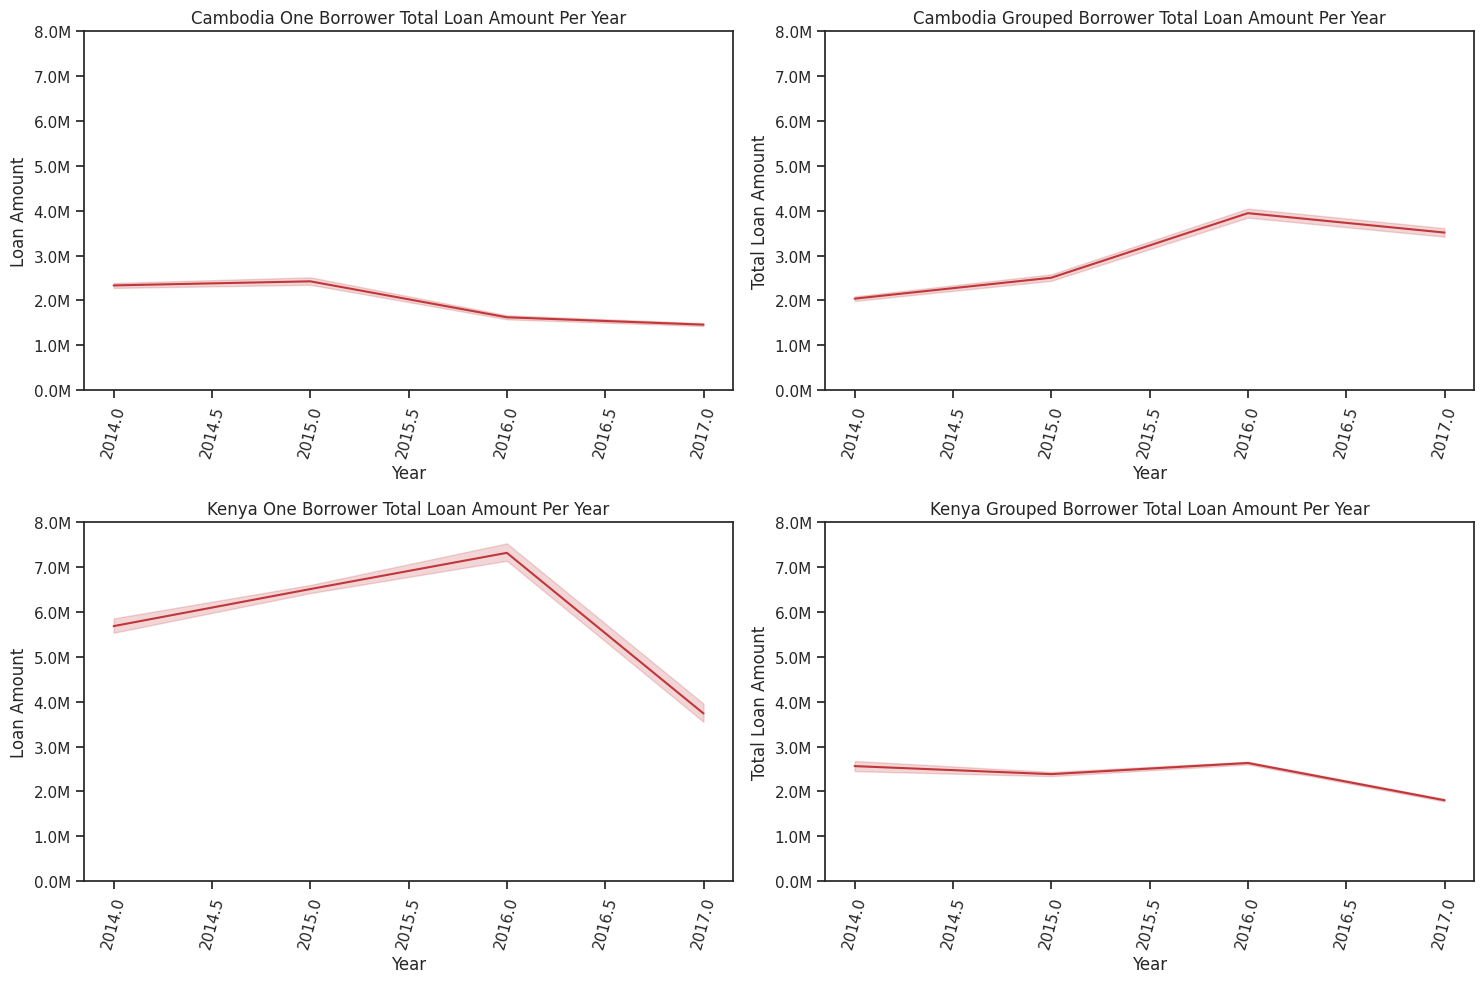

In [ ]:
plt.figure(figsize=[15, 10])

# Plot for Cambodia - One borrower
plt.subplot(2, 2, 1)
sns.lineplot(data=one_borrower_loan[one_borrower_loan['country'] == 'Cambodia'],
             x=one_borrower_loan[one_borrower_loan['country'] == 'Cambodia'].index.year, y='loan_amount',
             estimator=sum)
plt.title('Cambodia One Borrower Total Loan Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Cambodia - Grouped borrowers
plt.subplot(2, 2, 2)
sns.lineplot(data=group_borrower_loan[group_borrower_loan['country'] == 'Cambodia'],
             x=group_borrower_loan[group_borrower_loan['country'] == 'Cambodia'].index.year, y='loan_amount',
             estimator=sum)
plt.title("Cambodia Grouped Borrower Total Loan Amount Per Year")
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Kenya - One borrower
plt.subplot(2, 2, 3)
sns.lineplot(data=one_borrower_loan[one_borrower_loan['country'] == 'Kenya'],
             x=one_borrower_loan[one_borrower_loan['country'] == 'Kenya'].index.year, y='loan_amount',
             estimator=sum)
plt.title('Kenya One Borrower Total Loan Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Kenya - Grouped borrowers
plt.subplot(2, 2, 4)
sns.lineplot(data=group_borrower_loan[group_borrower_loan['country'] == 'Kenya'],
             x=group_borrower_loan[group_borrower_loan['country'] == 'Kenya'].index.year, y='loan_amount',
             estimator=sum)
plt.title("Kenya Grouped Borrower Total Loan Amount Per Year")
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots


# Display the plots
plt.tight_layout()
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most use have grouped_borrower?</span>

In [96]:
grouped_borrower_use= kivaloans[kivaloans['borrower_genders']=='both']['use'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower_use

,index,count
0,buy water filter,17071
1,buy fertilizers and other farm supplies,14826
2,clothing to sell,2974
3,buy ingredients forfood production business,1281
4,build sanitary toilet,1280
5,buy solar,1122
6,buy farm inputs,782
7,buy enough merchandise to sell at markets,643
8,buy groceries to sell,604
9,buy feeds and other supplies to Pigs,285


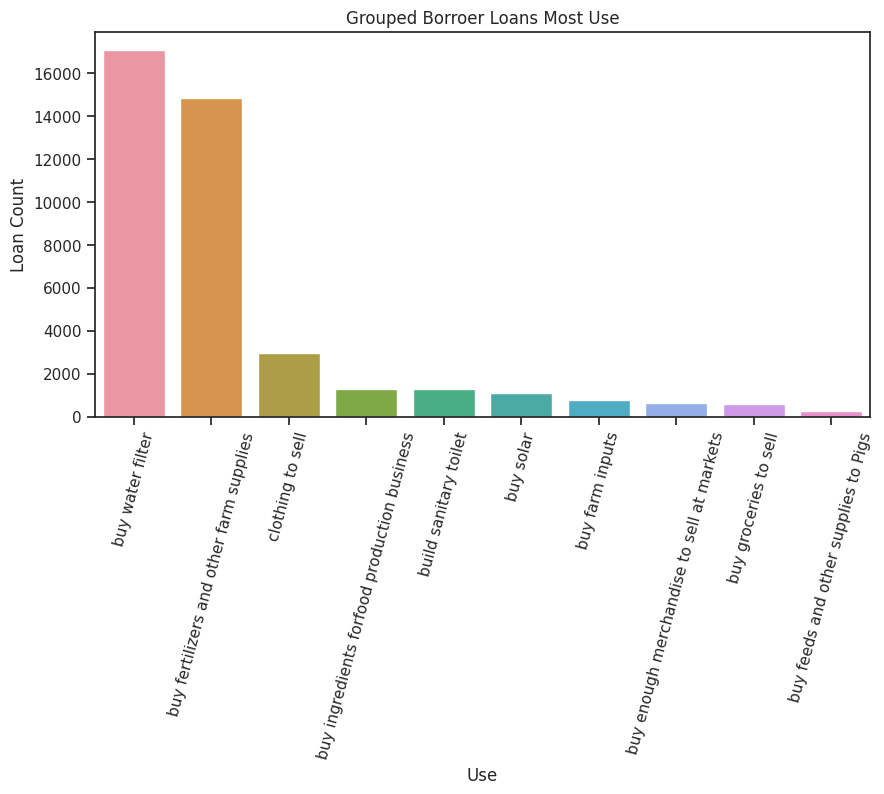

In [130]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower_use, x='index', y='count')

# Set the labels and title
plt.xlabel('Use')
plt.ylabel('Loan Count')
plt.title('Grouped Borroer Loans Most Use')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What is the common repayment intervals for grouped_borrower?</span>

In [97]:
grouped_borrower_repay= kivaloans[kivaloans['borrower_genders']=='both']['repayment_interval'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower_repay

,index,count
0,monthly,58851
1,irregular,28502
2,bullet,18416


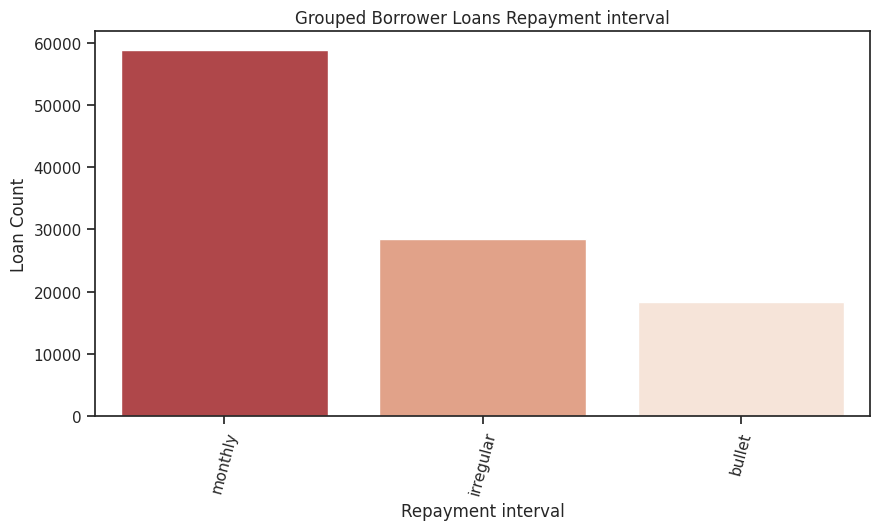

In [131]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower_repay, x='index', y='count')

# Set the labels and title
plt.xlabel('Repayment interval')
plt.ylabel('Loan Count')
plt.title('Grouped Borrower Loans Repayment interval')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per year for grouped_borrower?</span>

In [98]:
group_borrower_total_loan= kivaloans[kivaloans['borrower_genders']=='both']
group_borrower_total_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2015-03-19,858488,3250.0,3250.0,Cosmetics Sales,Retail,to buy up-to-date cosmetics,Tanzania,Mara North,TZS,87,2015-03-19 17:05:19+00:00,2015-03-05 08:00:00+00:00,2015-05-01 19:10:21+00:00,14,98,both,monthly,2015-03-05,2


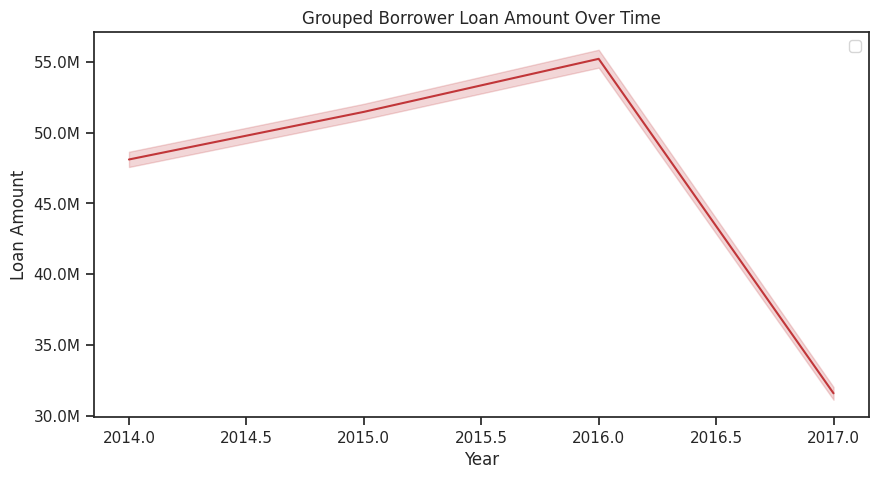

In [99]:
plt.figure(figsize = (10,5))
# Plot line chart for 'funded_amount'
sns.lineplot(data=group_borrower_total_loan, x=group_borrower_total_loan.index.year, y='loan_amount',
             estimator=sum)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.title('Grouped Borrower Loan Amount Over Time')
plt.legend()
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()